## Pandas Cheatsheet
* Jupyter Notebooks provide a way of organizing data-related calculations in order to help your user understand *how you arrived at a particular chart or calculation using Python.
* Pandas is a library that helps you work with and visualize data using Python. 

Here are some commands that might be useful for you as you work with the Pandas library:

| Command | Job |
|--|--|
|.read_csv| load dataframe from a CSV file |
|.head(n)|limits the number of rows to n |
|.set_index|sets the primary key of the table|
|.join|merges two tables together based on their key |
|dataframe['a', 'b']| only show columns a and b from the dataframe|
|.groupby(['a', 'b'])| performs an aggregate calculation (count, min, max) by columns a and b|
|.sort_values|sorts dataframe by the columns specified|
| dataframe.column_name | extracts 1 column from dataframe|
|dataframe.plot.barh()| plots the dataframe as a bar chart|


In [27]:
import pandas as pd
%matplotlib inline

### 1. read_csv
For creating a new dataframe from a CSV file

In [28]:
# Load Dataframes from disk:
violations = pd.read_csv("../data/Food_Establishment_Violations.csv", encoding="latin")


### 2. head
For limiting the number of rows

In [29]:
#preview the violations table:
violations.head(3)

,business_license,violation_date,violation,inspector_comments
0,13FOOD-0014,1/2/18,(32) TOILET AND HAND WASHING FACILITIES: Toile...,Provide soap and paper towels at the handsink ...
1,13FOOD-0014,1/2/18,(3) FOOD PROTECTION: Potentially hazardous foo...,CRITICAL VIOLATION.Cooked hamburgers at 110 F ...
2,08FOOD-0181,1/3/18,(10) CROSS CONTAMINATION: Food (ice) dispensin...,The dipper wells were storing utensils in wate...


### 3. column indexing (subsetting)
Makes a copy of the dataframe including only those columns listed

In [30]:
# show the number of violations by restaurant:

counts_table = violations[["business_license", "violation"]]
counts_table.head(3)

,business_license,violation
0,13FOOD-0014,(32) TOILET AND HAND WASHING FACILITIES: Toile...
1,13FOOD-0014,(3) FOOD PROTECTION: Potentially hazardous foo...
2,08FOOD-0181,(10) CROSS CONTAMINATION: Food (ice) dispensin...


### 4. groupby + aggregation method
Aggregates for every column listed in the groupby method

In [31]:
counts_table = counts_table.groupby(["business_license"]).count()
counts_table.head(5)

,violation
business_license,
08FOOD-0175,7
08FOOD-0180,7
08FOOD-0181,9
09FOOD-0020,13
09FOOD-0029,20


### 5. sort_values
Sords the table according to the column specified in either ascending or descending order:

In [32]:
counts_table = counts_table.sort_values('violation', ascending=False)
counts_table.head(10)

,violation
business_license,
09FOOD-0231,26
09FOOD-0117,24
09FOOD-0087,24
09FOOD-0247,23
15FOOD-0020,22
09FOOD-0066,22
09FOOD-0029,20
09FOOD-0073,19
12FOOD-0046,19


### 6. plot
Create a chart of your findings using Matplotlib.

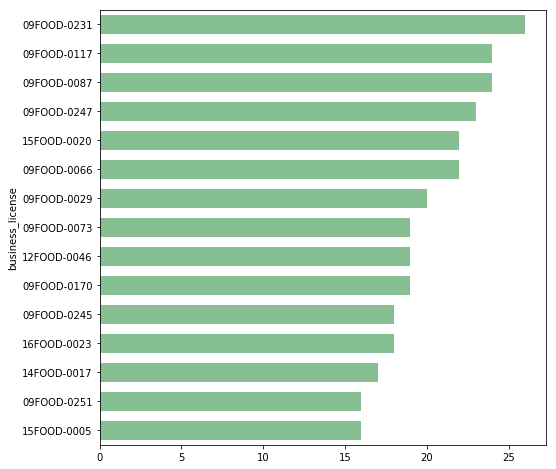

In [39]:
# get top 15:
violation_frequencies = counts_table.violation.head(15)

#reverse ordering:
violation_frequencies = violation_frequencies.iloc[::-1]

# define the plot parameters (color, etc.)
violation_frequencies.plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.65)

# draw the horizontal bar chart:
violation_frequencies.plot.barh()


### 7. filtering
To filter the table, define a rule, and then index the table according to the rule (kind of a weird syntax).

In [40]:
# show the most problematic restaurant / food establishment (09FOOD-0231, 09FOOD-0117, ...):

business_license = input('which food establishment do you want to know about? ')

# 1. create a filter rule
worst_offender = violations['business_license'] == business_license

# 2. apply the filter rule as an index to the dataframe
violations[worst_offender]

which food establishment do you want to know about? 09FOOD-0231


,business_license,violation_date,violation,inspector_comments
296,09FOOD-0231,6/19/18,(21) FOOD EQUIPMENT AND UTENSILS: Wiping cloth...,Wipe cloths are being stored on cutting boards...
312,09FOOD-0231,6/19/18,"(35) INSECT, RODENT, ANIMAL CONTROL: Presence ...",CRITICAL VIOLATION. Mice droppings were observ...
324,09FOOD-0231,3/13/18,"(36) FLOORS, WALLS AND CEILINGS: Floors; const...",Several areas of the floor tile and floor mold...
339,09FOOD-0231,10/18/18,"(37) FLOORS, WALLS AND CEILINGS: Walls, ceilin...",The wall behind the cook equipment is soiled. ...
357,09FOOD-0231,6/19/18,(2) FOOD: Original Container; properly labeled.,Bulk food items are not labeled. Any product o...
359,09FOOD-0231,6/19/18,"(37) FLOORS, WALLS AND CEILINGS: Walls, ceilin...",Ceiling tiles in the kitchen are soiled. Repla...
382,09FOOD-0231,6/19/18,(4) FOOD PROTECTION: Facilities to maintain pr...,CRITICAL VIOLATION. A cook line cooler in hold...
412,09FOOD-0231,10/18/18,(42) OTHER OPERATIONS: Premises; maintained; f...,The basement exit is cluttered. Properly store...
459,09FOOD-0231,10/18/18,"(36) FLOORS, WALLS AND CEILINGS: Floors; const...",The floors behind the freezers near the back e...
485,09FOOD-0231,3/13/18,(10) CROSS CONTAMINATION: Food (ice) dispensin...,Do not use plastic containers to dispense bulb...


## But which restaurants are these?
We have their business license information, but can we figure out who they are?

In [45]:
# load businesses data:
businesses = pd.read_csv("../data/Food_Establishment_Businesses.csv", encoding="latin")
businesses.head(3)

,business_license,business_name,address,city,state,zip_code,location,last_inspection_date
0,09FOOD-0032,Subway #46751,1900 DEMPSTER ST C,Evanston,IL,60202,"1900 DEMPSTER ST C\nEvanston, IL 60202\n(42.04...",01/10/2018
1,09FOOD-0015,Dar-Us-Sunnah Masjid & Community Center,2045 BROWN AVE,Evanston,IL,60201,"2045 BROWN AVE\nEvanston, IL 60201\n(42.055088...",01/10/2018
2,11FOOD-0003,Shop Now Food and Grocery,1942 MAPLE AVE,Evanston,IL,60201,"1942 MAPLE AVE\nEvanston, IL 60201\n(42.053481...",02/22/2018


### 8. joining
Joining two tables on a column:

In [48]:
# let's merge the two tables together:
merged_table = violations.set_index('business_license').join(businesses.set_index('business_license'))
merged_table = merged_table.reindex(columns=[
    'business_license', 'violation_date', 'violation', 'inspector_comments', 'business_name', 
    'address', 'city', 'state', 'zip_code', 'location', 'last_inspection_date'
])
merged_table.head(3)

,business_license,violation_date,violation,inspector_comments,business_name,address,city,state,zip_code,location,last_inspection_date
business_license,,,,,,,,,,,
08FOOD-0175,NaN,1/10/18,"(12) PERSONNEL: Hands washed; clean, good hygi...",CRITICAL VIOLATION.Observed employee wash her ...,Dunkin' Donuts Baskin-Robbins,1900 DEMPSTER ST D,Evanston,IL,60202.0,"1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...",08/08/2018
08FOOD-0175,NaN,1/10/18,(21) FOOD EQUIPMENT AND UTENSILS: Wiping cloth...,Quaternary ammonia in the wiping cloth bucket ...,Dunkin' Donuts Baskin-Robbins,1900 DEMPSTER ST D,Evanston,IL,60202.0,"1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...",08/08/2018
08FOOD-0175,NaN,1/10/18,(32) TOILET AND HAND WASHING FACILITIES: Toile...,Provide soap and paper towels at all handsinks...,Dunkin' Donuts Baskin-Robbins,1900 DEMPSTER ST D,Evanston,IL,60202.0,"1900 DEMPSTER ST D\nEvanston, IL 60202\n(42.04...",08/08/2018


In [49]:
# perform the same calculations as before, but on the new table:
# show the number of violations by restaurant:
counts_table = merged_table[["business_name", "violation"]]
counts_table = counts_table.groupby(["business_name", "business_license"]).count()
counts_table = counts_table.sort_values('violation', ascending=False)

counts_table.head(3)

,,violation
business_name,business_license,
Siam Paragon,09FOOD-0231,26
Bennison's Bakery,09FOOD-0117,24
Sarkis Cafe,09FOOD-0087,24


### Plot the new chart with the business names

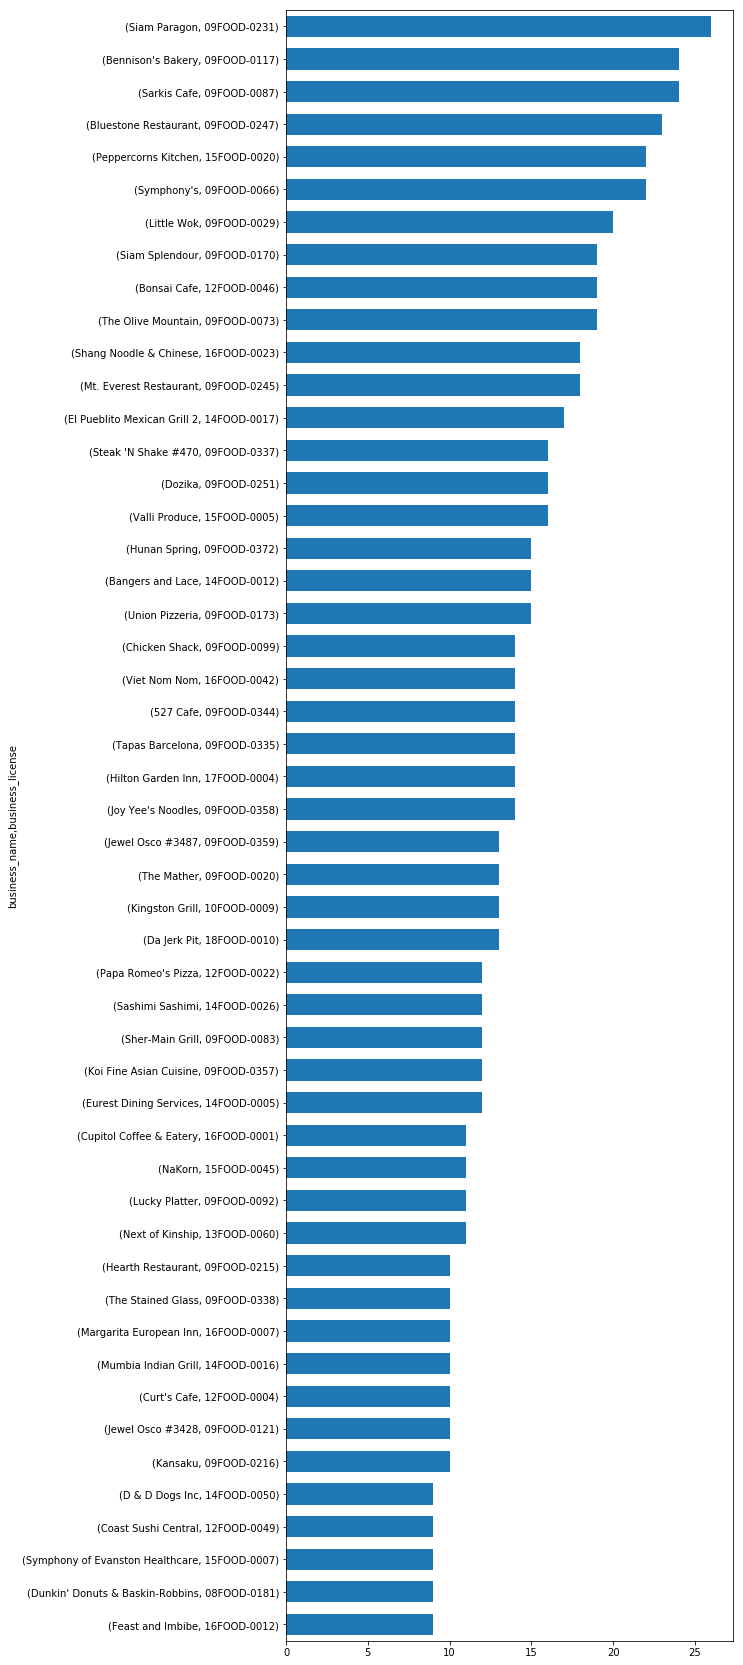

In [55]:
violation_frequencies = counts_table.violation.head(50)

#reverse ordering:
violation_frequencies = violation_frequencies.iloc[::-1]

violation_frequencies.plot(kind='barh', figsize=(8, 30), width=0.65)
violation_frequencies.plot.barh()